In [64]:
import pandas as pd

In [65]:
egdi = pd.read_csv('EGOV_DATA_2022.csv')

In [66]:
epart = egdi.melt(
    id_vars='Country Name',
    value_vars='E-Participation Index',
    var_name='EPART',
    value_name='Porcentagem',
    
)

In [67]:
epart['Country Name'] = epart['Country Name'].sort_values(ascending=True).reset_index(drop=True)

In [68]:
gov_expenditure = pd.read_excel('imf_government_expenditure.xls')

In [69]:
gov_expenditure['Country'] = gov_expenditure['Country'].sort_values(ascending=True)

In [70]:
paises = gov_expenditure['Country'].unique().tolist()

In [71]:
epart = epart[epart['Country Name'].isin(paises)].reset_index(drop=True)

In [72]:
paises = epart['Country Name'].unique().tolist()

In [73]:
gov_expenditure = gov_expenditure[gov_expenditure['Country'].isin(paises)].reset_index(drop=True)

In [74]:
dispersao = pd.DataFrame()

In [75]:
dispersao["Gastos do governo, porcentagem do PIB"] = gov_expenditure['Percentage']

In [76]:
dispersao['E-Participation Development Index'] = epart['Porcentagem']

In [77]:
dispersao['Gastos do governo, porcentagem do PIB'] = dispersao['Gastos do governo, porcentagem do PIB'].apply(lambda x: x/100.0)

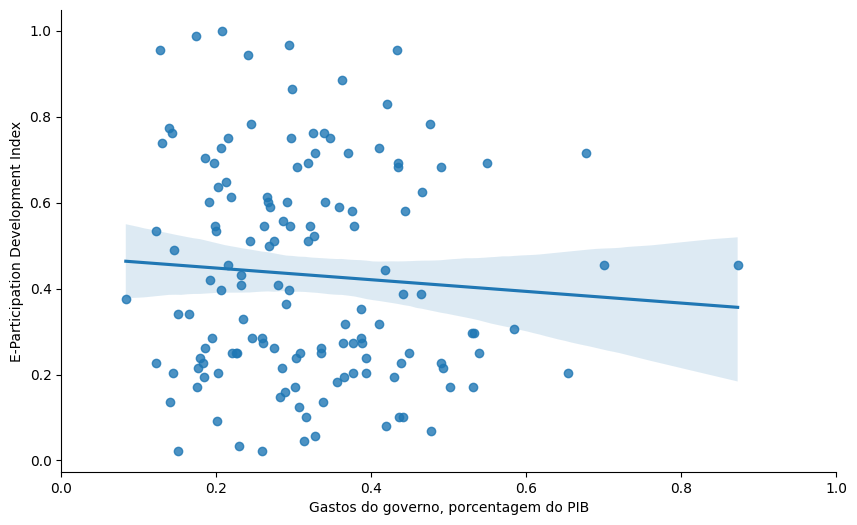

In [78]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))

sns.regplot(dispersao, x="Gastos do governo, porcentagem do PIB", y='E-Participation Development Index')

sns.despine()
plt.xlim(0, 1)
plt.show()